In [2]:
import joblib
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Coverage of haplotype assemblies

In [3]:
# Output from ../scripts/hap_mapstats.py
data = joblib.load("../data/hap_mapstats.jl")
# Index is the directory, directory name structure {project}_{sample}_{haplotag}
sample = pd.Series(data.index, index=data.index).str.split('_', expand=True)
sample.columns = ['project', 'sample', 'haplotag']
data = data.join(sample)

data['appx genome % 1x'] = data["reference bases single covered"] / 3.2e9

# Join with metadata
meta = pd.read_csv("../../metadata/metadata.txt", sep='\t')
meta.set_index('Individual', inplace=True)
data['sex'] = data['sample'].map(meta['Sex'])
data['population'] = data['sample'].map(meta['Superpopulation code'])

In [128]:
print(len(data), "haplotypes")
print(len(data.groupby(['sample', 'project']).size()), 'samples')
print(len(data['sample'].unique()) - 1, 'individuals') # HG002 == NA24385 so -1

172 haplotypes
86 samples
78 individuals


In [129]:
replicates = data[data["haplotag"].isin(["H1", "pat"])]['sample'].value_counts()
replicates["NA24385"] += 1
replicates[replicates != 1]

HG00733    3
NA19240    2
NA24385    3
HG03486    2
HG02818    2
NA12878    2
Name: sample, dtype: int64

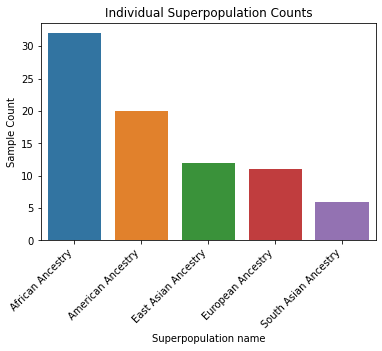

In [118]:
view = meta.groupby("Superpopulation name").size().to_frame("Sample Count")
p = sb.barplot(data=view.reset_index(), x="Superpopulation name", y="Sample Count") 
p.set_title("Individual Superpopulation Counts")
hide = plt.xticks(rotation=45, ha='right')

[Text(0.5, 1.0, 'Percent of the reference (3.2e9bp) singly covered'),
 Text(0, 0.5, 'Haplotype count')]

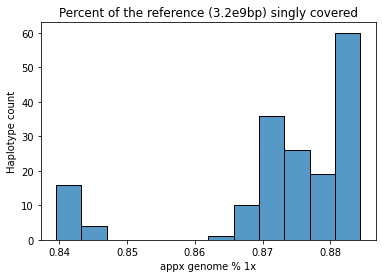

In [5]:
p = sb.histplot(data=data, x="appx genome % 1x")
p.set(title="Percent of the reference (3.2e9bp) singly covered", ylabel="Haplotype count")

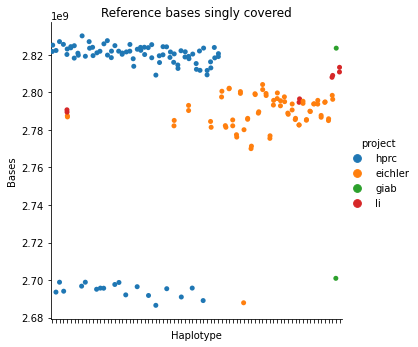

In [6]:
p = sb.catplot(data=data, x="sample", y="reference bases single covered", hue='project')
p.set(xticklabels=[], title="Reference bases singly covered", ylabel="Bases", xlabel="Haplotype")

Technically giab project is an hprc assembly.

What's up with the 2.70e9 vs 2.82e9?
Is it a sex difference?

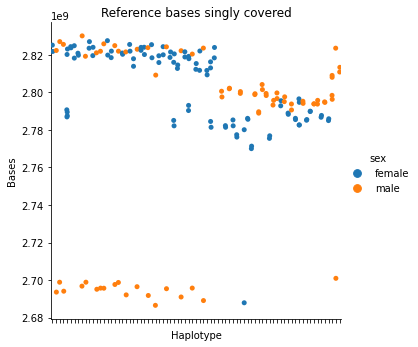

In [7]:
p = sb.catplot(data=data, x="sample", y="reference bases single covered", hue='sex')
p.set(xticklabels=[], title="Reference bases singly covered", ylabel="Bases", xlabel="Haplotype")

Ok, so the lower bin is almost exclusively males. But males aren't exclusive to the lower bin..

In [8]:
data['is_lower_cov'] = data["reference bases single covered"] < 2.72e9
data.groupby(['is_lower_cov', 'sex']).size().unstack()

sex,female,male
is_lower_cov,,
False,95,55
True,1,19


Let's check population real quick

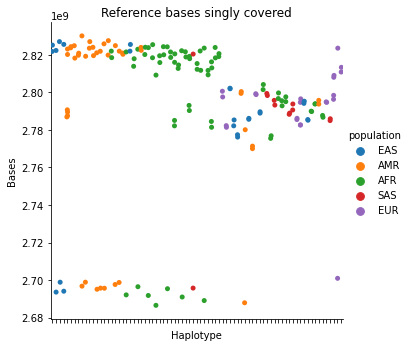

In [9]:
p = sb.catplot(data=data, x="sample", y="reference bases single covered", hue='population')
p.set(xticklabels=[], title="Reference bases singly covered", ylabel="Bases", xlabel="Haplotype")

In [12]:
# looking at the lower_covered 
data[data["is_lower_cov"]]

,Number of mapped sequences,Number of primary alignments,Number of secondary alignments,Number of primary alignments with >65535 CIGAR operations,Number of bases in mapped sequences,Number of mapped bases,Number of substitutions,"Number of insertions in [0,50)","Number of insertions in [50,100)","Number of insertions in [100,300)",...,reference bases single covered,reference bases uncovered,reference bases multi covered,project,sample,haplotag,appx genome % 1x,sex,population,is_lower_cov
hprc_HG005_H1,997,1687,0,0,11067736126,2808852891,9339259,424563,3900,4985,...,2693574795,370998303,23696734,hprc,HG005,H1,0.841742,male,EAS,True
hprc_HG00621_H1,575,1212,0,0,10790176931,2782442122,7995243,396780,3660,4478,...,2698842428,372395569,17031835,hprc,HG00621,H1,0.843388,male,EAS,True
hprc_HG00673_H1,676,1392,0,0,7703990819,2790103898,9808089,403721,3571,4690,...,2694051175,372449016,21769641,hprc,HG00673,H1,0.841891,male,EAS,True
hprc_HG01106_H1,653,1510,0,0,16694025317,2800766727,9294469,399186,3703,4671,...,2696747506,371293235,20229091,hprc,HG01106,H1,0.842734,male,AMR,True
hprc_HG01109_H1,783,1552,0,0,9978657048,2798527303,10882661,422325,4027,4898,...,2698851527,367247767,22170538,hprc,HG01109,H1,0.843391,male,AMR,True
hprc_HG01243_H1,801,1434,0,0,10475675728,2788673111,9678460,422387,3877,4981,...,2695087273,369815879,23366680,hprc,HG01243,H1,0.842215,male,AMR,True
hprc_HG01258_H1,595,1373,0,0,9863256924,2793359331,10262081,408772,3720,4720,...,2695692574,369152932,23424326,hprc,HG01258,H1,0.842404,male,AMR,True
hprc_HG01358_H1,882,1607,0,0,15672708864,2806303662,9974078,400709,3915,5174,...,2695636090,368122770,24510972,hprc,HG01358,H1,0.842386,male,AMR,True
hprc_HG01928_H1,646,1471,0,0,12608706693,2796848987,10647793,406428,3819,4722,...,2697628725,369458400,21182707,hprc,HG01928,H1,0.843009,male,AMR,True
hprc_HG01952_H1,663,1326,0,0,8064569583,2784374273,9217817,396149,3555,4640,...,2698708602,372204923,17356307,hprc,HG01952,H1,0.843346,male,AMR,True


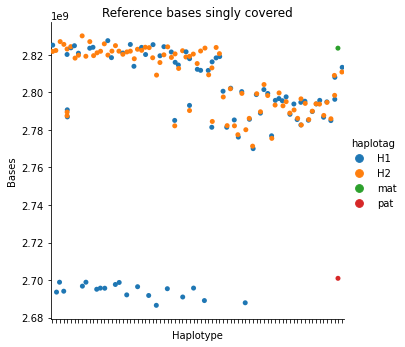

In [13]:
# There's a pattern in haplotag?
p = sb.catplot(data=data, x="sample", y="reference bases single covered", hue='haplotag')
p.set(xticklabels=[], title="Reference bases singly covered", ylabel="Bases", xlabel="Haplotype")

The one female in the lower bin is an eichler assembly. I have previously seen evidence that the parental haplotype assignment of contigs in the eichler/li assemblies aren't perfect. So it's possible some of the `eichler_HG00732_H1` assembly actually belongs in `eichler_HG00732_H2`. That's reasonable to consider but still doesn't explain the pattern.

In [14]:
data[data['is_lower_cov'] & (data['sex'] == 'female')][['project', 'sample']]

,project,sample
eichler_HG00732_H1,eichler,HG00732


What if the regions not covered singly are covered multiple-ly!?

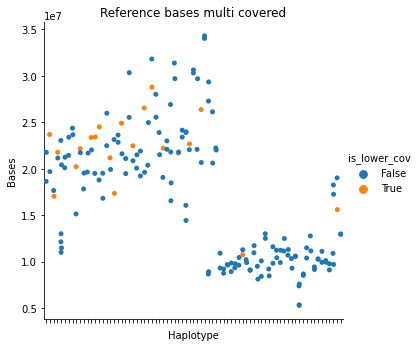

In [15]:
p = sb.catplot(data=data, x="sample", y="reference bases multi covered", hue='is_lower_cov')
p.set(xticklabels=[], title="Reference bases multi covered", ylabel="Bases", xlabel="Haplotype")

I think I'm just seeing project

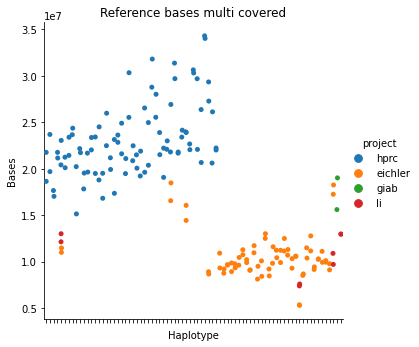

In [16]:
p = sb.catplot(data=data, x="sample", y="reference bases multi covered", hue='project')
p.set(xticklabels=[], title="Reference bases multi covered", ylabel="Bases", xlabel="Haplotype")

Check uncovered, too

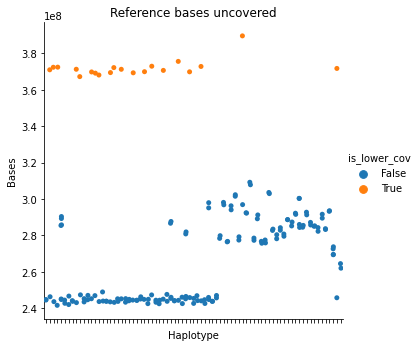

In [17]:
p = sb.catplot(data=data, x="sample", y="reference bases uncovered", hue='is_lower_cov')
p.set(xticklabels=[], title="Reference bases uncovered", ylabel="Bases", xlabel="Haplotype")

This leads me to believe there's big deletions or something. I have to go back to the bed files to figure out if the uncovered regions are shared. See `chrYExplore.ipynb`.

My hypothesis is that some of these uncovered regions from males' H1 are large chrY DELs. If this is the case, we might be able to pull out alignments from those regions, see if they're split, and use that to build a 'large DEL' caller to complement paftools.jl

# Variant calling stats

In [22]:
data.columns

Index(['Number of mapped sequences', 'Number of primary alignments',
       'Number of secondary alignments',
       'Number of primary alignments with >65535 CIGAR operations',
       'Number of bases in mapped sequences', 'Number of mapped bases',
       'Number of substitutions', 'Number of insertions in [0,50)',
       'Number of insertions in [50,100)', 'Number of insertions in [100,300)',
       'Number of insertions in [300,400)',
       'Number of insertions in [400,1000)',
       'Number of insertions in [1000,inf)', 'Number of deletions in [0,50)',
       'Number of deletions in [50,100)', 'Number of deletions in [100,300)',
       'Number of deletions in [300,400)', 'Number of deletions in [400,1000)',
       'Number of deletions in [1000,inf)', 'reference bases single covered',
       'reference bases uncovered', 'reference bases multi covered', 'project',
       'sample', 'haplotag', 'appx genome % 1x', 'sex', 'population',
       'is_lower_cov'],
      dtype='object')

[Text(0.5, 1.0, 'Mapped sequences per-haplotype assembly'),
 Text(0, 0.5, 'Haplotype Count')]

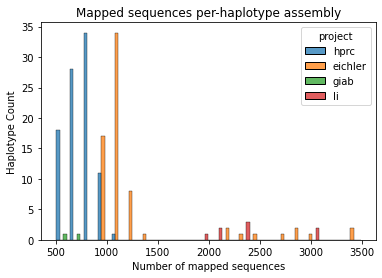

In [21]:
p = sb.histplot(data=data, x="Number of mapped sequences", hue="project", multiple='dodge')
p.set(title="Mapped sequences per-haplotype assembly", ylabel="Haplotype Count")

[Text(0.5, 1.0, 'Mapped bases per-haplotype assembly'),
 Text(0, 0.5, 'Haplotype Count')]

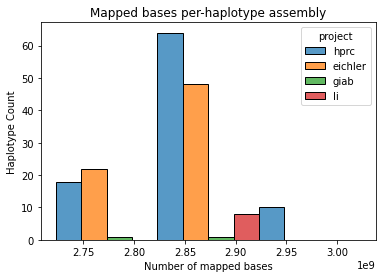

In [27]:
p = sb.histplot(data=data, x="Number of mapped bases", hue="project", multiple='dodge', binwidth=1e8)
p.set(title="Mapped bases per-haplotype assembly", ylabel="Haplotype Count")

In [37]:
# Make variant size plot
col_order = ['Number of deletions in [1000,inf)',
             'Number of deletions in [400,1000)',
             'Number of deletions in [300,400)',
             'Number of deletions in [100,300)',
             'Number of deletions in [50,100)', 
             'Number of deletions in [0,50)',
             'Number of substitutions', 
             'Number of insertions in [0,50)',
             'Number of insertions in [50,100)', 
             'Number of insertions in [100,300)',
             'Number of insertions in [300,400)',
             'Number of insertions in [400,1000)',
             'Number of insertions in [1000,inf)']
new_names = pd.Series([_.split(' ')[-1] for _ in col_order])
new_names[:6] = '-' + new_names[:6]
new_names[6] = "SNV"
name_map = {_[0]:_[1] for _ in zip(col_order, new_names)}

{'Number of deletions in [1000,inf)': '-[1000,inf)',
 'Number of deletions in [400,1000)': '-[400,1000)',
 'Number of deletions in [300,400)': '-[300,400)',
 'Number of deletions in [100,300)': '-[100,300)',
 'Number of deletions in [50,100)': '-[50,100)',
 'Number of deletions in [0,50)': '-[0,50)',
 'Number of substitutions': 'SNV',
 'Number of insertions in [0,50)': '[0,50)',
 'Number of insertions in [50,100)': '[50,100)',
 'Number of insertions in [100,300)': '[100,300)',
 'Number of insertions in [300,400)': '[300,400)',
 'Number of insertions in [400,1000)': '[400,1000)',
 'Number of insertions in [1000,inf)': '[1000,inf)'}

In [41]:
view = data.melt(id_vars=['project','sample', 'haplotag', 'population'], 
                 value_vars=col_order, var_name='SizeBin', value_name='count')
view['SizeBin'] = view["SizeBin"].map(name_map)

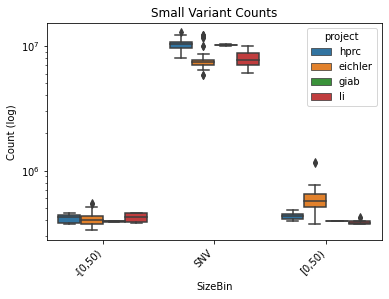

In [72]:
p = sb.boxplot(data=view[view["SizeBin"].isin(new_names[5:8])], x="SizeBin", y="count", hue='project')
p.set(title="Small Variant Counts", ylabel="Count (log)", yscale='log')
hide = plt.xticks(rotation=45, ha='right')

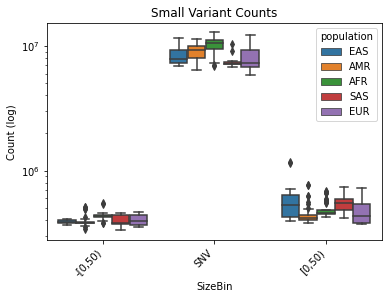

In [73]:
p = sb.boxplot(data=view[view["SizeBin"].isin(new_names[5:8])], x="SizeBin", y="count", hue='population')
p.set(title="Small Variant Counts", ylabel="Count (log)", yscale='log')
hide = plt.xticks(rotation=45, ha='right')

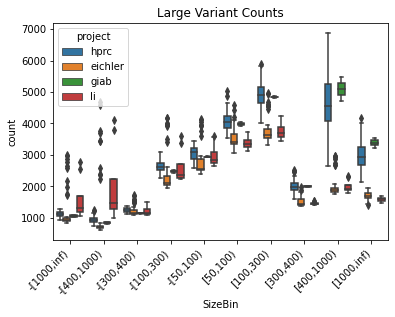

In [74]:
p = sb.boxplot(data=view[~view["SizeBin"].isin(new_names[5:8])], x="SizeBin", y="count", hue='project')
p.set(title="Large Variant Counts")
hide = plt.xticks(rotation=45, ha='right')

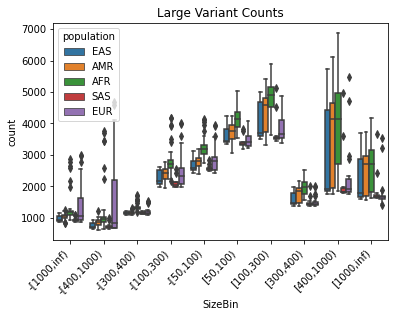

In [75]:
p = sb.boxplot(data=view[~view["SizeBin"].isin(new_names[5:8])], x="SizeBin", y="count", hue='population')
p.set(title="Large Variant Counts")
hide = plt.xticks(rotation=45, ha='right')

In [89]:
data[">=50bp DEL Total"] = data[col_order[:5]].sum(axis=1)
data["Small Variant Total"] = data[col_order[5:8]].sum(axis=1)
data[">=50bp INS Total"] = data[col_order[8:]].sum(axis=1)
big_bin_cols = [">=50bp DEL Total", "Small Variant Total", ">=50bp INS Total"]

In [133]:
view = data.melt(id_vars=['project','sample', 'haplotag', 'population', 'sex'], 
                 value_vars=big_bin_cols, var_name='SizeBin', value_name='count')

[Text(0.5, 1.0, 'Small Variants')]

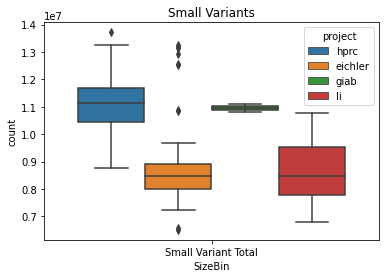

In [93]:
p = sb.boxplot(data=view[view["SizeBin"] == "Small Variant Total"], x="SizeBin", y="count", hue='project')
p.set(title="Small Variants")

[Text(0.5, 1.0, 'Small Variants')]

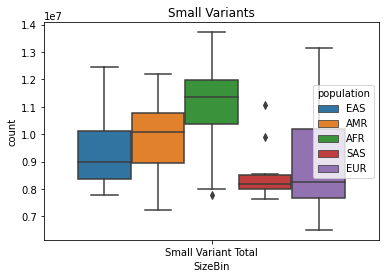

In [94]:
p = sb.boxplot(data=view[view["SizeBin"] == "Small Variant Total"], x="SizeBin", y="count", hue='population')
p.set(title="Small Variants")

[Text(0.5, 1.0, 'Large Variants')]

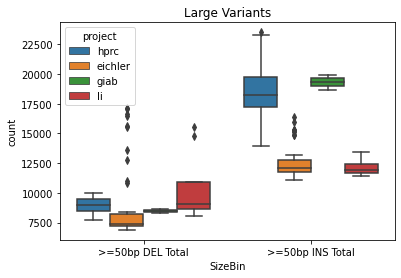

In [96]:
p = sb.boxplot(data=view[view["SizeBin"] != "Small Variant Total"], x="SizeBin", y="count", hue='project')
p.set(title="Large Variants")

[Text(0.5, 1.0, 'Large Variants')]

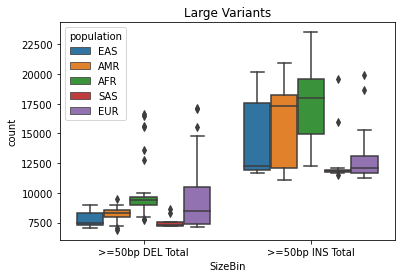

In [97]:
p = sb.boxplot(data=view[view["SizeBin"] != "Small Variant Total"], x="SizeBin", y="count", hue='population')
p.set(title="Large Variants")

[Text(0.5, 1.0, 'Large Variants')]

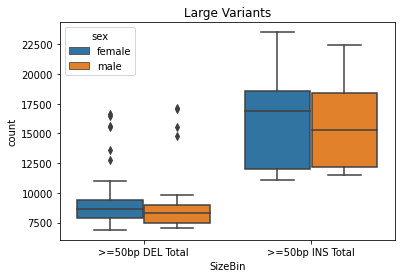

In [134]:
p = sb.boxplot(data=view[view["SizeBin"] != "Small Variant Total"], x="SizeBin", y="count", hue='sex')
p.set(title="Large Variants")